Write a program to implement the K Nearest Neighbor algorithm. (Use iris dataset)

Dataset Loaded Successfully!
Feature Shape: (150, 4)
Target Shape: (150,)

MODEL PERFORMANCE (KNN):
Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



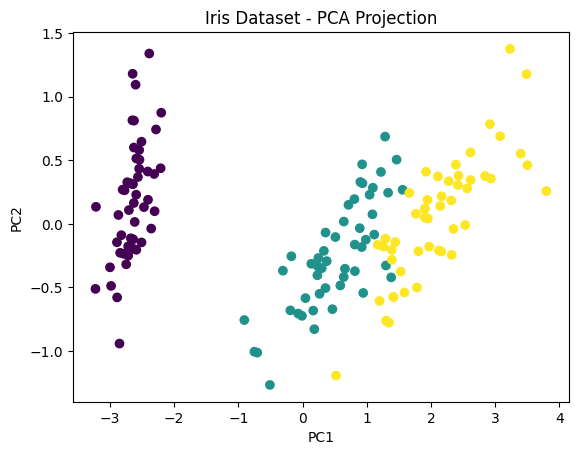

In [1]:
# ==========================================
# 1️⃣ IMPORT LIBRARIES
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

# ==========================================
# 2️⃣ LOAD IRIS DATASET
# ==========================================
iris = datasets.load_iris()
X = iris.data            # Features: sepal length, width, etc.
Y = iris.target          # Classes: 0, 1, 2

print("Dataset Loaded Successfully!")
print("Feature Shape:", X.shape)
print("Target Shape:", Y.shape)

# ==========================================
# 3️⃣ TRAIN-TEST SPLIT (80% train, 20% test)
# ==========================================
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42, stratify=Y
)

# ==========================================
# 4️⃣ FEATURE SCALING (VERY IMPORTANT FOR KNN)
# ==========================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ==========================================
# 5️⃣ TRAIN KNN CLASSIFIER
# ==========================================
k = 5   # number of nearest neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, Y_train)

# Predictions
y_pred = model.predict(X_test)

# ==========================================
# 6️⃣ EVALUATION
# ==========================================
print("\nMODEL PERFORMANCE (KNN):")
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# ==========================================
# 7️⃣ VISUALIZATION (Optional)
# PCA for visualization in 2D
# ==========================================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)

plt.scatter(X_proj[:, 0], X_proj[:, 1], c=Y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Dataset - PCA Projection")
plt.show()
